In [1]:
import numpy as np

def convolution2d(input_matrix, kernel):
    input_height, input_width = input_matrix.shape
    kernel_height, kernel_width = kernel.shape

    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1

    output_matrix = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_height):
            region = input_matrix[i:i + kernel_height, j:j + kernel_width]
            output_matrix[i, j] = np.sum(region * kernel)

    return output_matrix

input_matrix = np.array([[45, 63, 27], [36, 18, 81], [9, 54, 72]])
kernel = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

result = convolution2d(input_matrix, kernel)
print(result)

[[45.]]


Тип тензора: <class 'tensorflow.python.framework.ops.EagerTensor'>
Розмір тензора: (372, 744, 3)


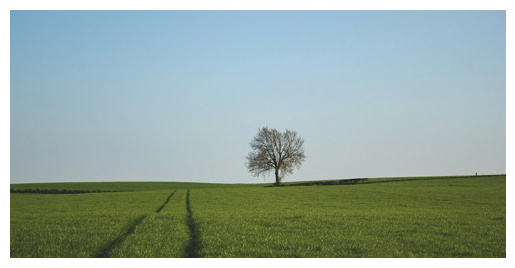

In [3]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

img_bgr = cv2.imread('/content/sample_data/37fuyfmauezs60896suwed5rnh120h94.jpg')

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_tf = tf.convert_to_tensor(img_rgb, dtype=tf.float32)
print(f"Тип тензора: {type(img_tf)}")
print(f"Розмір тензора: {img_tf.shape}")

# 5. Відображаємо зображення
plt.imshow(img_rgb)
plt.axis('off')  # Вимикаємо осі
plt.show()

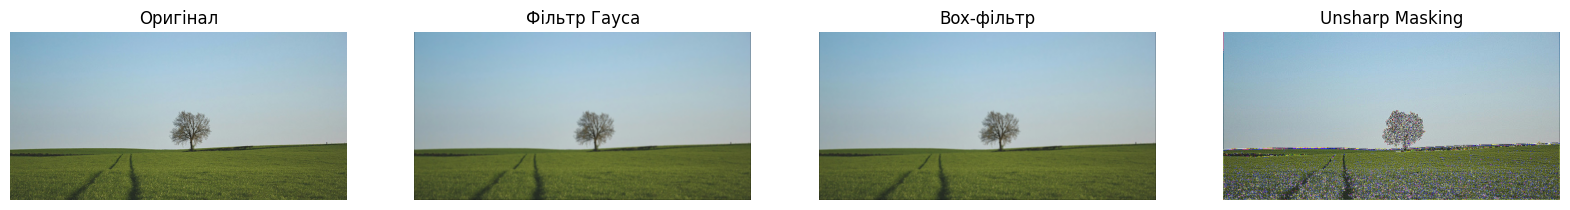

In [4]:
from scipy.ndimage import gaussian_filter

# Зчитуємо зображення
#img_bgr = cv2.imread('/content/sample_data/37fuyfmauezs60896suwed5rnh120h94.jpg')
#img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Перетворюємо зображення у тензор TensorFlow
#img_tf = tf.convert_to_tensor(img_rgb, dtype=tf.float32)

# Створюємо фільтр Гауса вручну
def gaussian_kernel(size, sigma):
    axis = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(axis, axis)
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Box-фільтр
def box_filter(size):
    return np.ones((size, size)) / (size * size)

# Функція для застосування фільтра до кожного каналу окремо
def apply_filter(image, kernel):
    filtered_channels = []
    for i in range(3):  # Для кожного каналу RGB
        channel = image[:, :, i]
        channel_filtered = tf.nn.conv2d(channel[tf.newaxis, ..., tf.newaxis], kernel[..., tf.newaxis, tf.newaxis], strides=[1, 1, 1, 1], padding='SAME')
        filtered_channels.append(tf.squeeze(channel_filtered))
    return tf.stack(filtered_channels, axis=-1)

# Створюємо ядра для Гауса і box-фільтру
gaussian_kernel_tf = tf.convert_to_tensor(gaussian_kernel(5, 1.0), dtype=tf.float32)
box_kernel_tf = tf.convert_to_tensor(box_filter(3), dtype=tf.float32)
unsharp_kernel  = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Застосовуємо фільтри
gaussian_filtered = apply_filter(img_tf, gaussian_kernel_tf)
box_filtered = apply_filter(img_tf, box_kernel_tf)
unsharp_filtered = apply_filter(img_tf, unsharp_kernel)

# Unsharp Masking: oригінал - Гаус
#unsharp_mask = img_tf - gaussian_filtered

# Конвертуємо тензори в NumPy для візуалізації
gaussian_filtered_np = gaussian_filtered.numpy().astype(np.uint8)
box_filtered_np = box_filtered.numpy().astype(np.uint8)
unsharp_mask_np = unsharp_filtered.numpy().astype(np.uint8)

# Візуалізація результатів
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(img_rgb)
axes[0].set_title("Оригінал")
axes[0].axis('off')

axes[1].imshow(gaussian_filtered_np)
axes[1].set_title("Фільтр Гауса")
axes[1].axis('off')

axes[2].imshow(box_filtered_np)
axes[2].set_title("Box-фільтр")
axes[2].axis('off')

axes[3].imshow(unsharp_mask_np)
axes[3].set_title("Unsharp Masking")
axes[3].axis('off')

plt.show()


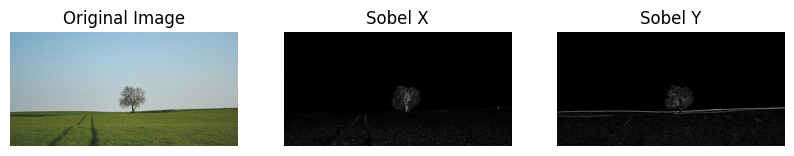

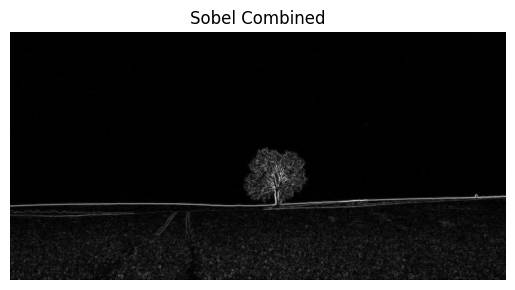

In [5]:
# Зчитуємо кольорове зображення
img = cv2.imread('/content/sample_data/37fuyfmauezs60896suwed5rnh120h94.jpg')

# Перетворюємо зображення в градації сірого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Обчислюємо градієнти за допомогою оператора Собеля
# Обчислення градієнта по X
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

# Обчислення градієнта по Y
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Обчислюємо загальний градієнт (величину границі)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Візуалізація результатів
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Sobel Y')
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.axis('off')

plt.figure()
plt.title('Sobel Combined')
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')
plt.show()

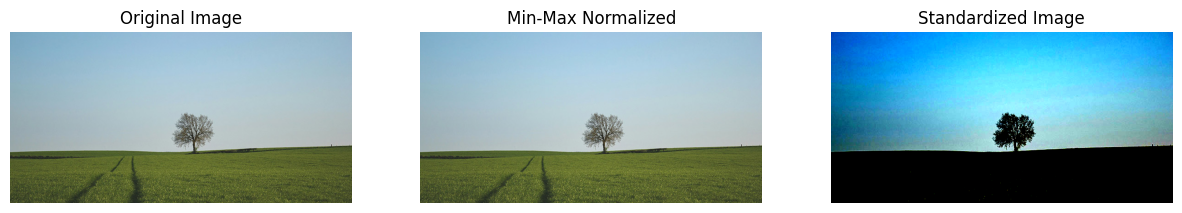

In [6]:
# Зчитуємо зображення
#img = cv2.imread('/content/sample_data/37fuyfmauezs60896suwed5rnh120h94.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Перетворення в RGB для правильного відображення

# Min-Max нормалізація
def min_max_normalization(img):
    img_min = np.min(img)
    img_max = np.max(img)
    normalized_img = (img - img_min) / (img_max - img_min)
    return normalized_img

# Стандартизація
def standardization(img):
    mean = np.mean(img)
    std = np.std(img)
    standardized_img = (img - mean) / std
    return standardized_img

# Застосування Min-Max нормалізації та стандартизації
normalized_img = min_max_normalization(img)
standardized_img = standardization(img)

# Візуалізація результатів
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Min-Max Normalized')
plt.imshow(normalized_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Standardized Image')
plt.imshow(standardized_img, cmap='gray')
plt.axis('off')

plt.show()
